<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Thank you for taking the time to improve the project! Now it is accepted. Good luck on the next sprint! 

</div>

<b>Review</b>

Hi, my name is Dmitry and I will be reviewing your project.

You can find my comments in colored markdown cells:

<div class="alert alert-success">
    If everything is done successfully.
</div>

<div class="alert alert-warning">
    If I have some (optional) suggestions, or questions to think about, or general comments.
</div>

<div class="alert alert-danger">
    If a section requires some corrections. Work can't be accepted with red comments.
</div>

Please don't remove my comments, as it will make further review iterations much harder for me.

Feel free to reply to my comments or ask questions using the following template:

<div class="alert alert-info">
    For your comments and questions.
</div>

First of all, thank you for turning in the project! You did a great job overall, there's only a couple of small issues that need to be fixed before it can be accepted. It's very straightforward though. Good luck!

# Project Description

The management OilyGiant mining company wants to make a decision on which mine wells to mine. The company data on oil quality and volume of reserves of three mining regions have been made available for use. We are required to:
1. Build a model for predicting the volume of reserves in the new wells.
2. Pick the oil wells with the highest estimated values.
3. Use bootstrap technique to analyze potential profit and risk the wells. 


# Business Goal

Build a model that would predict the volume of reserves in new wells at oilyGiant mining company by;
1. Splitting data into train and test samples.
2. Calculate the RMSE score of the model using Linear regression.
3. Calculate the profit of each well and also calculate the average profit.
4. Use bootstrap technique with 1000 samples to find the distribution of profit.
5. Calculate the average profit, 95% confidence interval and risk of losses. 

In [1]:
import pandas as pd 
import numpy as np
from numpy.random import RandomState
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy import stats as st

In [2]:
def data_info(df):
    print('Head: ')
    print(df.head())
    print('-END--')
    print('Info')
    print(df.info())
    print('-END--')
    print('Percentage Null Values')
    print((df.isnull().sum())/df.shape[0])
    print('-END--')
    print('Duplicates: ')
    print(df.duplicated().sum())
    print('-END--')
    print('Describe:')
    print(df.describe())
    

In [3]:
try: 
    geo_data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    geo_data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    geo_data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')
except:
    geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [4]:
data_info(geo_data_0)
display(data_info(geo_data_1))
display(data_info(geo_data_2))

Head: 
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
-END--
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
-END--
Percentage Null Values
id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64
-END--
Duplicates: 
0
-END--
Describe:
                  f0             f1             f2        product
count  1000

None

Head: 
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746
-END--
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
-END--
Percentage Null Values
id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64
-END--
Duplicates: 
0
-END--
Describe:
                  f0             f1             f2        product
count  1000

None

# Conclusion 

There are no missing/duplicated values for all three regions. The volume of data in all three datasets are the same with identical features and targets. 

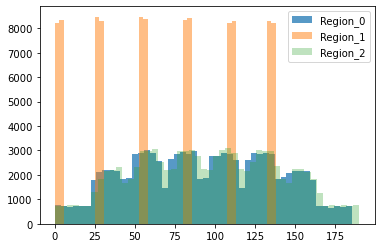

In [5]:
plt.hist(geo_data_0['product'],bins=50,alpha=0.75)
plt.hist(geo_data_1['product'],bins=50,alpha=0.5)
plt.hist(geo_data_2['product'],bins=50,alpha=0.3)
plt.legend(['Region_0','Region_1','Region_2']);

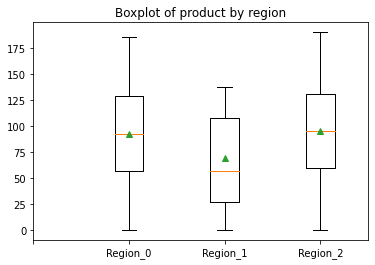

In [6]:
plt.boxplot([geo_data_0['product'],geo_data_1['product'],geo_data_2['product']], showmeans=True)
plt.title('Boxplot of product by region')
plt.xticks(range(4),["",'Region_0','Region_1','Region_2']);

# Conclusion

The graph above shows the structure and distribution of the target values(product) for the three regions. Region 0 and region 2 have their means and median to be approximately the same whiles that of region two are different with its median/mean below the median/mean values of region 0 and region 2.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright, the data was loaded and inspected!

</div>

In [7]:
def plot_matrix(df):
    """ This function takes the dataframe and plots a matrix plot of the dataset"""
    sns.pairplot(df, corner=True)

In [8]:
def profit_cal(df,x_train,x_valid,y_train,y_valid):
    """ This function takes the dataframe and the split data to calculate the total product and profit."""
    reg_0_val = pd.DataFrame()
    reg_0_val['predicted'] = lr.predict(features)
    reg_0_val['actual']= target.values
    total_prod_cal = (reg_0_val.sample(n_points,random_state=123)
                      .sort_values('predicted',ascending=False).iloc[:n_sub_points,].actual.sum())
                                                                        
    profit = (total_prod_cal * revenue_per_barrel) - ini_invest
    print('Total Product: {:.2f}'.format(total_prod_cal))
    print('Profit: {:.2f}'.format(profit))  

<div class="alert alert-warning">
<b>Reviewer's comment</b>

The function for model training is correct, although I don't understand what's the point of discarding the model and the predictions and retraining it again for profit calculation and bootstrapping

</div>

In [9]:
state = RandomState(123)
def boostrapping_sample(df):
    """This function based on the bootstrapping method, takes the dataframe 
    and generates the total product based on the sample data"""
    reg_0_val = pd.DataFrame()
    reg_0_val['predicted'] = lr.predict(features)
    reg_0_val['actual']= target.values 
    values = []
    for i in range(1000):
        subsample = (reg_0_val.sample(n_points,random_state=state, replace =True)
                     .sort_values('predicted',ascending=False).iloc[:n_sub_points,].actual.sum())
        values.append(subsample)
    return pd.Series(values)

In [10]:
def profit_confidence_intal(df):
    """ It takes the dataframe and the results from the bootstrapping to 
    calculate the confidence interval, loss risk, profit distribution and the mean of profit."""
    results = boostrapping_sample(df)
    profit = (results * revenue_per_barrel) -ini_invest
    sns.displot(profit,kde=True, bins=50)
    confidence_interval = st.t.interval(0.95,len(results)-1, profit.mean(),profit.sem())
    loss_risk = len(profit[profit<0])/len(profit)
    print('profit mean: {:.2f}'.format(profit.mean()))
    print(f"Confidence interval,({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")
    print(f'Risk of loss, {loss_risk:.2%}')

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Profit is calculated correctly, although it would be better if this function was specifically calculating profit, rather than training the model, generating predictions and then calculating profit. It seems that the code is duplicated unnecessarily.

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Profit is calculated incorrectly (compare with the profit calculation above).

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Fixed!

</div>

## Train and test the model for each region
### Split the data into a training set and validation set at a ratio of 75:25.
### Print the average volume of predicted reserves and model RMSE.
## Prepare for profit calculation
### Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.


## Write a function to calculate profit from a set of selected oil wells and model predictions
### Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.
## Calculate risks and profit for each region
### Use the bootstrap technique with 1000 samples to find the distribution of profit.
### Find average profit, 95% confidence interval and risk of losses. Loss is negative profit.
### Provide findings: suggest a region for development of oil wells and justify the choice

In [11]:
n_points = 500
n_sub_points = 200
ini_invest = 100000000
revenue_per_barrel = 4500
risk_threshold_max = 0.025
invest_per_barrel = ini_invest/ n_points
n_volumns = 1000 
print('The volume of reserves sufficient for developing a new well \
without losses is: {:.2f}'.format(ini_invest/n_sub_points/revenue_per_barrel))

The volume of reserves sufficient for developing a new well without losses is: 111.11


<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Calculation is correct

</div>

# Region_0

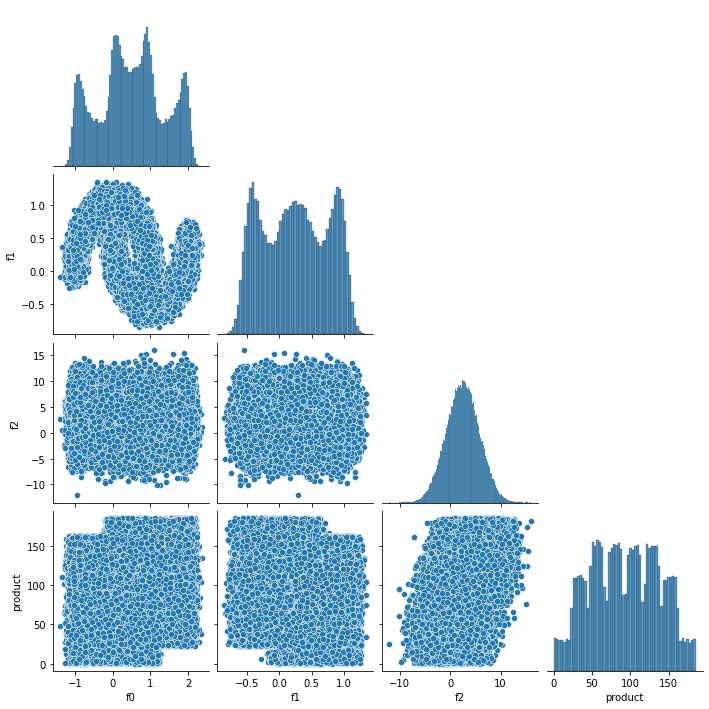

In [12]:
plot_matrix(geo_data_0)

The matrix show that, there is no correlation in the data for region 0.

In [13]:
features = geo_data_0.drop(['id','product'],axis=1)
target = geo_data_0['product']
x_train,x_valid, y_train, y_valid = train_test_split(features,target, test_size=0.25, random_state=123)
lr = LinearRegression().fit(x_train, y_train)
print('RMSE: ',mean_squared_error(y_valid,lr.predict(x_valid),squared=False))
print('R^2: ',lr.score(x_valid,y_valid))
print('y_pred_mean: ',lr.predict(x_valid).mean())

RMSE:  37.64786282376176
R^2:  0.2812975228159569
y_pred_mean:  92.54936189116309


The mean for the region is 92.5 whiles its RMSE is 37.6. 

In [14]:
profit_cal(geo_data_0,x_train,x_valid,y_train,y_valid)

Total Product: 23245.03
Profit: 4602635.66


The total product from the region after sampling 500 wells is 23,245 resulting in a net profit for the sampled wells of 4,602,635.

profit mean: 4206175.50
Confidence interval,(4043943.47, 4368407.54)
Risk of loss, 5.30%


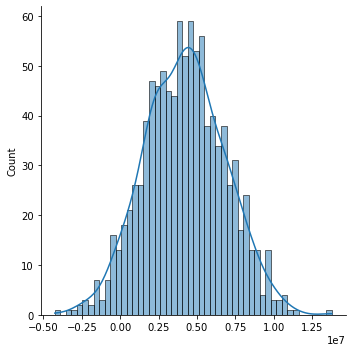

In [15]:
profit_confidence_intal(geo_data_0)

## Conclusion
With bootstrapping, the profit mean from the sampled data is **4,206,175** with **risk of loss of 5.3%** and **confidence interval ranging from 4,043,943.47 to 4,368,407.54**

# Region 1

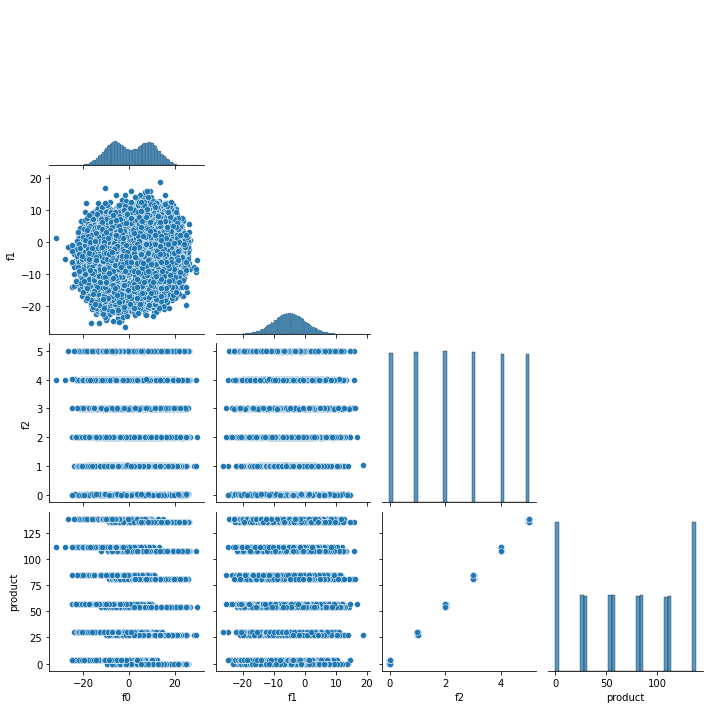

In [16]:
plot_matrix(geo_data_1)

In [17]:
features = geo_data_1.drop(['id','product'],axis=1)
target = geo_data_1['product']
x_train,x_valid, y_train, y_valid = train_test_split(features,target, test_size=0.25, random_state=123)
lr = LinearRegression().fit(x_train, y_train)
print('RMSE: ',mean_squared_error(y_valid,lr.predict(x_valid),squared=False))
print('R^2: ',lr.score(x_valid,y_valid))
print('y_pred_mean: ',lr.predict(x_valid).mean())

RMSE:  0.8954139804944308
R^2:  0.9996180923165817
y_pred_mean:  69.28001860653978


The mean of the result form the region is 69 with RMSE of 0.89. 

In [18]:
profit_cal(geo_data_1,x_train,x_valid,y_train,y_valid)

Total Product: 22963.49
Profit: 3335692.80


profit mean: 4450486.11
Confidence interval,(4326111.02, 4574861.19)
Risk of loss, 1.40%


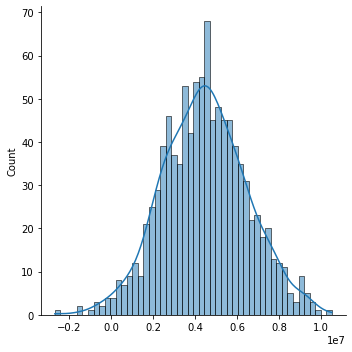

In [19]:
profit_confidence_intal(geo_data_1)

## Conclusion
The region has high average profit and 1.4% in risk of loss which is also lower compared to that from region 0.

# Region 2

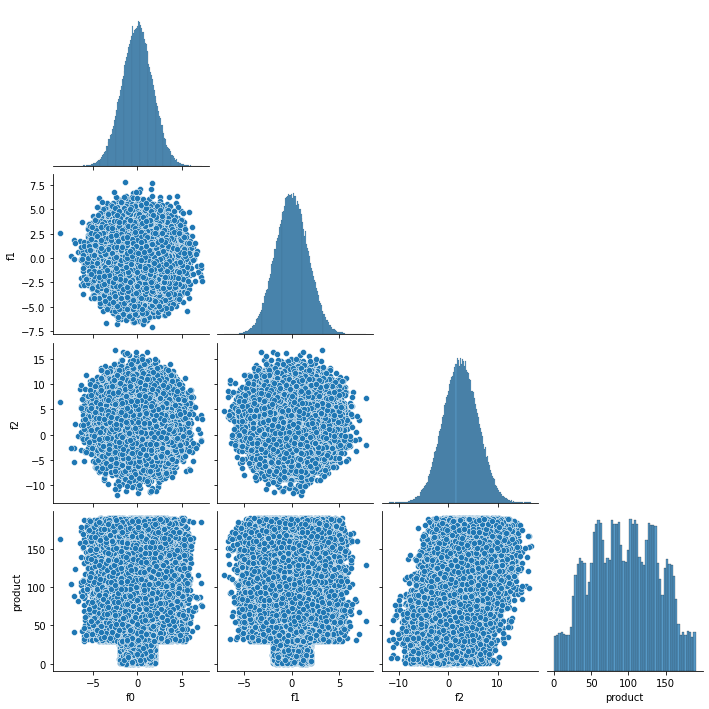

In [20]:
plot_matrix(geo_data_2)

In [21]:
features = geo_data_2.drop(['id','product'],axis=1)
target = geo_data_2['product']
x_train,x_valid, y_train, y_valid = train_test_split(features,target, test_size=0.25, random_state=123)
lr = LinearRegression().fit(x_train, y_train)
print('RMSE: ',mean_squared_error(y_valid,lr.predict(x_valid),squared=False))
print('R^2: ',lr.score(x_valid,y_valid))
print('y_pred_mean: ',lr.predict(x_valid).mean())

RMSE:  40.12803006598514
R^2:  0.19313657905573023
y_pred_mean:  95.09859933591373


In [22]:
profit_cal(geo_data_2,x_train,x_valid,y_train,y_valid)

Total Product: 23679.09
Profit: 6555900.93


profit mean: 3707221.35
Confidence interval,(3540374.17, 3874068.53)
Risk of loss, 8.70%


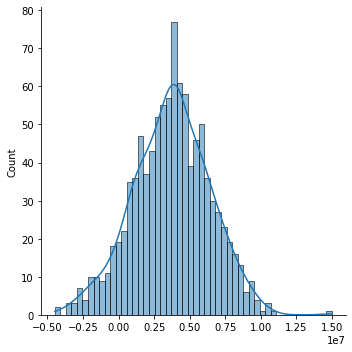

In [23]:
profit_confidence_intal(geo_data_2)

## Conclusion
This region has low average profit and a very high risk of loss compared to the other regions.

Its an omission from my part. I limited the output results because of the distribution graph for which I should have stated as such in my conclusion.

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

Ok, still, it would be nice to be explicit about this!

</div>

# Conclusion
**Data Exploration and Analysis**
There were null/duplicated values in the data sets for all three regions.

**Findings**
1. The volume of reserves sufficient for developing a new well without losses is: 111.11.
2. Region 2 generated the highest revenue of 6,555,900 relative to total product of 500 sampled wells compared to 4,602 635 and 3,335,692 for region 1 and region 0 respectively.
3. Average profit was highest for region 1 with 4,450,486, compared to 4,206,175 for region 0 and 3,707,221 for region 2.
4. Region 2 had the highest risk of loss of 8.70%.
5. Region 1 has the optimal confidence interval among the three regions.

***
Based on the results, the most recommended region for development should be Region 1.


<div class="alert alert-success">
<b>Reviewer's comment V2</b>

The problems were fixed!

</div>